<img src="../code/Resources/cropped-SummerWorkshop_Header.png"> 

<h1 align="center">Workshop 1: Tutorial on neuronal encoding and behavior</h1> 
<h3 align="center">Summer Workshop on the Dynamic Brain</h3> 
<h3 align="center">Thursday, August 26th, 2025</h3> 
<h4 align="center">Day 2</h4> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px;">

<p> During the lecture, we learned about behavioral states and how they affect the processing of sensory stimuli and, consequently, motor outputs. In this workshop, we will explore how to define behavioral states and investigate both external and internal markers of state changes reflected through behavior as well as neural activity. We will examine these phenomena in mice as they perform a context-dependent decision-making task.

<p> During the task, the mice are engaged in behavior that requires them to process contextual cues, interact with their environment, and display a variety of behavioral state sequences. Meanwhile, Neuropixels electrodes record brain-wide spiking activity across the cortex and several hippocampal, striatal and thalamic areas. The behavioral task, therefore, offers an opportunity to study the dynamics of spiking activity during various behavioral states and aids in understanding the behavioral dynamics of task performance and engagement.     
</div>

<center><img src="Resources/DR_task_description.png", width="9000" height="390"> </center>

In [3]:
# add a plot of the brain areas recorded? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px">

<p> The Dynamic Routing (DR) dataset, <a href="https://allenswdb.github.io/physiology/ephys/visual-behavior/VB-Neuropixels.html">DR Databook</a> consists of brain-wide recordings of neural activity measured using six Neuropixels probes from five mice trained to perform a context-dependent decision-making task. Throughout the session, behavior video cameras and running sensors continuously track various body parts, running speed, and pupil size of the subjects.

<p> In this go/no-go task, mice are required to selectively respond to either visual or auditory stimuli presented in alternating trial blocks. Each block, signaled by instruction trials, lasts 10 minutes. During visual blocks, mice must respond only to the visual target stimulus, while during auditory blocks, they must respond only to the auditory target stimulus. In both cases, they must suppress responses to non-target stimuli. The blocks alternate between visual and auditory modalities, and mice earn water rewards by correctly reporting (licking the reward spout) when the target stimulus appears in the currently rewarded modality.  
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px ">

The DR dataset is stored as Neurodata Without Borders (NWB) files, a standardized format for storing neurophysiology data. To access these files, we will use the Python library <a href="https://pynwb.readthedocs.io/en/stable/tutorials/index.html">pynwb</a>, which is designed for reading and writing NWB data. We begin by importing this library along with other standard Python libraries for data preprocessing and plotting.

</div>

In [8]:
# Standard library
import os  

# Data handling packages
import numpy as np  
import numpy.random as npr  
import pandas as pd 
import pynwb  

# Progress bar utility
from tqdm import tqdm  # Displays a smart progress bar during loops

# Preprocessing
from sklearn.preprocessing import StandardScaler  # Standardizes features (zero mean, unit variance)

# Plotting libraries
import matplotlib.pyplot as plt  
from matplotlib import colors  
import seaborn as sns  

# Pandas display settings
pd.set_option('display.max_columns', None)  # Ensures all columns are shown when printing DataFrames

# Inline plotting for Jupyter Notebooks
%matplotlib inline  


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; ">
Let’s examine the NWB file structure of a single experimental session and explore the metadata recorded for each behavioral trial. All experimental sessions share the same NWB structure.
</div>

In [5]:
# pick a session_id and get session data

example_session_ids = ['664851_2023-11-15', '668755_2023-08-31', '674562_2023-10-03', '759434_2025-02-04']

session_id = example_session_ids[0]
nwb_path = f'/root/capsule/data/{session_id}/{session_id}.nwb'

# access the session data with pynwb
session = pynwb.NWBHDF5IO(nwb_path).read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


In [ ]:
# Quick reference of the NWB file structure
# Important groups include: units, trials, epochs, and processing 

session

Data type,float64
Shape,"(411155,)"
Array size,3.14 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(411136,)"
Array size,3.14 MiB
Chunk shape,None


In [ ]:
trials = session.trials.to_dataframe() 

trials.head(8)

,start_time,stop_time,quiescent_start_time,quiescent_stop_time,stim_start_time,stim_stop_time,response_window_start_time,response_window_stop_time,task_control_response_time,response_time,reward_time,post_response_window_start_time,post_response_window_stop_time,stim_name,block_index,rewarded_modality,trial_index,trial_index_in_block,repeat_index,is_response,is_correct,is_incorrect,is_hit,is_false_alarm,is_correct_reject,is_miss,is_go,is_nogo,is_rewarded,is_noncontingent_reward,is_contingent_reward,is_reward_scheduled,is_instruction,is_aud_stim,is_vis_stim,is_catch,is_target,is_aud_target,is_vis_target,is_nontarget,is_aud_nontarget,is_vis_nontarget,is_vis_rewarded,is_aud_rewarded,is_block_switch,is_repeat,is_opto
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2393.42596,2398.93057,2393.42596,2394.89383,2394.935370,2395.435370,2395.01060,2395.92807,2395.27749,2395.27647,2395.29418,2395.958706,2398.961226,sound1,0,aud,0,0.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
1,2399.11410,2404.61870,2399.11410,2400.58194,2400.623530,2401.123530,2400.69870,2401.61618,2400.93222,2400.92353,2400.94893,2401.646734,2404.649204,sound1,0,aud,1,1.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
2,2404.95227,2410.45692,2404.95227,2406.42019,2406.460910,2406.960910,2406.53692,2407.45436,2406.75381,2406.74954,2406.77049,2407.484904,2410.487484,sound1,0,aud,2,2.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
3,2410.67376,2416.17837,2410.67376,2412.14162,2412.182310,2412.682310,2412.25842,2413.17586,NaN,NaN,2413.17586,2413.206516,2416.209026,sound1,0,aud,3,3.0,0.0,False,False,True,False,False,False,True,True,False,True,True,False,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
4,2416.74550,2422.25016,2416.74550,2418.21342,2418.254680,2418.754680,2418.33015,2419.24761,2418.63042,2418.61845,2418.64708,2419.278266,2422.280816,sound1,0,aud,4,4.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
5,2423.20090,2428.70554,2423.20090,2424.66882,2424.732764,2425.233134,2424.78556,2425.70302,NaN,NaN,NaN,2425.733594,2428.736084,vis2,0,aud,5,5.0,0.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False
6,2430.12342,2435.62802,2430.12342,2431.59129,2431.631980,2432.131980,2431.70806,2432.62546,2431.95827,2431.94986,NaN,2432.656186,2435.658706,sound2,0,aud,6,6.0,0.0,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False
7,2437.67970,2443.18430,2437.67970,2439.14760,2439.211504,2439.711934,2439.26437,2440.18183,2439.69811,2439.68523,NaN,2440.212374,2443.214814,vis1,0,aud,7,7.0,0.0,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px">
Now that we have the trials dataframe, one straightforward way to get a sense of the mouse’s behavioral state over time is to look at their response times across the session.    
</div>

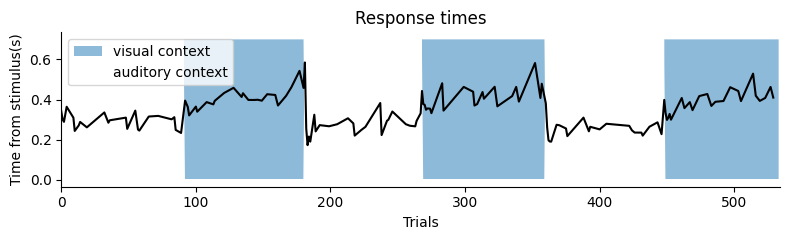

In [63]:
# get reaction times for each 
response_times = trials[trials.is_hit].response_time - trials[trials.is_hit].stim_start_time

fig, ax = plt.subplots(figsize = (8, 2.5))
ax.plot(response_times, color = 'k')

# add context 
vis_context = trials.is_vis_rewarded
ax.fill_between(vis_context.index, np.zeros(len(vis_context)), 0.7*vis_context, alpha = 0.5, label = 'visual context')
ax.fill_between(vis_context.index, np.zeros(len(vis_context)), 0.7*(1 - vis_context), color = 'w', alpha = 1, label = 'auditory context')

# Formatting 
ax.set_title('Response times')
ax.set_ylabel("Time from stimulus(s)")
ax.set_xlabel("Trials")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc = 'upper left')
ax.set_xlim(0, len(trials))
plt.tight_layout()


<div style="background: rgb(32, 177, 13); border-radius: 3px; padding: 10px; color: white;"> 
<p><b>Task 1.1:</b> Could you quantify the average response times for each context, including their standard deviations? We’ve provided code to access the response times for the visual block—please complete the code to calculate the response times for the auditory block.
</p> </div>

In [92]:
# Blank coding cell to work out Task 1.1
# response times in visual block 

vis_hit_trials = trials[(trials.is_hit) & (trials.is_vis_rewarded)]
vis_response_times = vis_hit_trials.response_time - vis_hit_trials.stim_start_time
mean_vis_response_time = np.nanmean(vis_response_times.values)
std_vis_response_time = np.nanstd(vis_response_times.values)

aud_hit_trials = trials[(trials.is_hit) & (trials.is_aud_rewarded)]
aud_response_times = aud_hit_trials.response_time - aud_hit_trials.stim_start_time
mean_aud_response_time = np.nanmean(aud_response_times.values)
std_aud_response_time = np.nanstd(aud_response_times.values)

print(f'Visual block, average response time: {mean_vis_response_time:.2f} ± {std_vis_response_time:.2f}')
print(f'Auditory block, average response time: {mean_aud_response_time: .2f} ± {std_aud_response_time:.2f}')


Visual block, average response time: 0.40 ± 0.05
Auditory block, average response time:  0.28 ± 0.06


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; ">
These mice appear to systematically alter their response times across different context blocks, responding consistently faster to the auditory target stimulus than the visual target stimulus. These changes in response times to stimuli in different contexts can also be visualized through lick raster plots.  
</div>

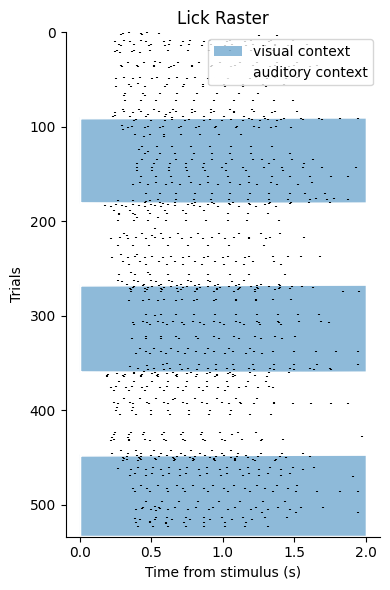

In [88]:
# lick counts
lick_data = session.processing['behavior']['licks']
lick_times = lick_data.timestamps[:]

# filter for outliers
lick_duration = lick_data.data[:]
lick_duration_threshold = 0.5
lick_times = lick_times[lick_duration < lick_duration_threshold]

# determine window of interest
trial_start = trials.stim_start_time.values
trial_stop = trials.stim_start_time.values + 2


# get licks per trial
in_bin = (lick_times[:, None] >= trial_start) & (lick_times[:, None] < trial_stop)
raster_times = [
    lick_times[in_bin[:, i]] - trial_start[i]
    for i in range(len(trial_start))
]

# Plot with eventplot
fig, ax = plt.subplots(figsize=(4, 6))
ax.eventplot(raster_times, orientation='horizontal', colors='black', linelengths=0.8)

# add context 
vis_context = trials.is_vis_rewarded
ax.fill_betweenx(vis_context.index, np.zeros(len(vis_context)), 2*vis_context, alpha = 0.5, label = 'visual context')
ax.fill_betweenx(vis_context.index, np.zeros(len(vis_context)), 2*(1 - vis_context), color = 'w', alpha = 1, label = 'auditory context')

# formatting 
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trials')
ax.set_title('Lick Raster')
ax.set_ylim(0, len(trials))
plt.gca().invert_yaxis()  # Trial 0 at top
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc = 'upper right')
plt.tight_layout()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px ">
This difference in response times suggests a shift in the mouse’s behavioral state with the changing context of the task. Using this insight we can set a threshold on response time to define a visual and an audtory context state. What would you set as a good threshold? 
</div>



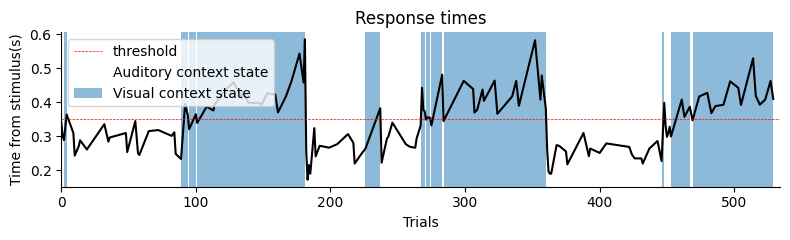

In [105]:
response_time_threshold = 0.35

hit_trials = trials[trials.is_hit]
num_hit_trials = len(hit_trials)
response_times = hit_trials.response_time - hit_trials.stim_start_time

context_states = response_times > response_time_threshold

fig, ax = plt.subplots(figsize = (8, 2.5))
ax.plot(response_times, color = 'k')
ax.plot([0, len(trials)], [response_time_threshold, response_time_threshold], color = 'r', ls = '--', lw = 0.5, label = 'threshold')

# add context context_states 
switch_trials = np.where(np.diff(context_states.values))[0]
switch_trials = np.concatenate(([0], switch_trials, [num_hit_trials-1]))

# Plot boundaries to mark context_state transitions
for i, trial in enumerate(switch_trials[:-1]):
    if not context_states.values[trial+1]: 
        ax.axvspan(hit_trials.index[trial], hit_trials.index[switch_trials[i+1]], facecolor='w', alpha=0.5, label = 'Auditory context state')
    else:
        ax.axvspan(hit_trials.index[trial], hit_trials.index[switch_trials[i+1]], facecolor='tab:blue', alpha=0.5,label = 'Visual context state')

# Formatting 
ax.set_title('Response times')
ax.set_ylabel("Time from stimulus(s)")
ax.set_xlabel("Trials")


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlim(0, len(trials))
plt.tight_layout()

<div>

<p> However, there are several other variables that can provide information about a subject's behavioral states. For example, </p>

<ul style="margin-top: 0;">
<li>Arousal variables such as locomotion and pupil dilation.</li>
<li>Facial expressions.</li>
<li>Task performance, etc</li>
</ul>

<p>
Let’s first look at each of these categories and how mice vary their behaviors.
</p>

</div>

In [7]:
# HMM-related imports from JAX, Dynamax, and TensorFlow Probability
from functools import partial
import jax.numpy as jnp
import jax.random as jr
from dynamax.hidden_markov_model import GaussianHMM
import tensorflow_probability.substrates.jax.distributions as tfd
from dynamax.utils.utils import find_permutation

# Additional HMM variants and plotting utilities from Dynamax
from dynamax.hidden_markov_model import (
    DiagonalGaussianHMM,
    SphericalGaussianHMM,
    SharedCovarianceGaussianHMM
)

from dynamax.utils.plotting import CMAP, COLORS, white_to_color_cmap


In [ ]:
# access trials table and set interval 

quiescent_start = trials.stim_start_time.values - 1.5
quiescent_stop = trials.quiescent_stop_time.values

trial_start = trials.start_time.values 
trial_stop = trials.stop_time.values 

In [11]:
def get_trialwise_values(x, timestamps, start, stop, mean_value=True):
    """
    Extracts trial-wise summary statistics of different behaviors (mean or median) from a time-aligned signal.

    Parameters:
    - x : array-like
        Signal values (e.g., neural data or behavioral measurements).
    - timestamps : array-like
        Time points corresponding to each value in x.
    - start : array-like
        Start times for each trial.
    - stop : array-like
        Stop times for each trial.
    - mean_value : bool, default=True
        If True, compute the mean within each trial window; otherwise compute the median.

    Returns:
    - values : list
        List of mean or median values for each trial window.
    """
    
    if mean_value:
        # Compute mean of x within each [start, stop] window
        return [np.nanmean(x[np.logical_and(s1 <= timestamps, timestamps <= s2)]) 
                for s1, s2 in zip(start, stop)]
    else:
        # Compute median of x within each [start, stop] window
        return [np.nanmedian(x[np.logical_and(s1 <= timestamps, timestamps <= s2)]) 
                for s1, s2 in zip(start, stop)]

In [12]:
# face expressions

facial_data = {}

# facial expressions: 
def get_facial_feature(part_name, facial_features_df):
    confidence = facial_features_df[f'{part_name}_likelihood']
    temporal_norm = facial_features_df[f'{part_name}_temporal_norm']
    y = 492 - facial_features_df[f'{part_name}_y']
    y[(confidence < 0.98) | (temporal_norm > np.nanmean(temporal_norm) + 3 * np.nanstd(temporal_norm))] = np.nan
    y = pd.Series(y).interpolate(limit_direction='both').to_numpy() 
    return y


facial_features_df = session.processing['behavior']['lp_side_camera'][:]
feature_timestamps = facial_features_df['timestamps'].values.astype('float')


ear = get_facial_feature('ear_base_l', facial_features_df)
facial_data['ear_median_position'] = get_trialwise_values(ear, feature_timestamps, quiescent_start, quiescent_stop, mean_value=False)

jaw = get_facial_feature('jaw', facial_features_df)
facial_data['jaw_median_position'] =  get_trialwise_values(jaw, feature_timestamps, quiescent_start, quiescent_stop, mean_value=False)

nose = get_facial_feature('nose_tip', facial_features_df)
facial_data['nose_median_position'] = get_trialwise_values(nose, feature_timestamps, quiescent_start, quiescent_stop, mean_value=False)

whisker_pad =  get_facial_feature('whisker_pad_l_side', facial_features_df)
facial_data['whisker_median_position'] = get_trialwise_values(whisker_pad, feature_timestamps,  quiescent_start, quiescent_stop, mean_value=False)

facial_data = pd.DataFrame(facial_data)

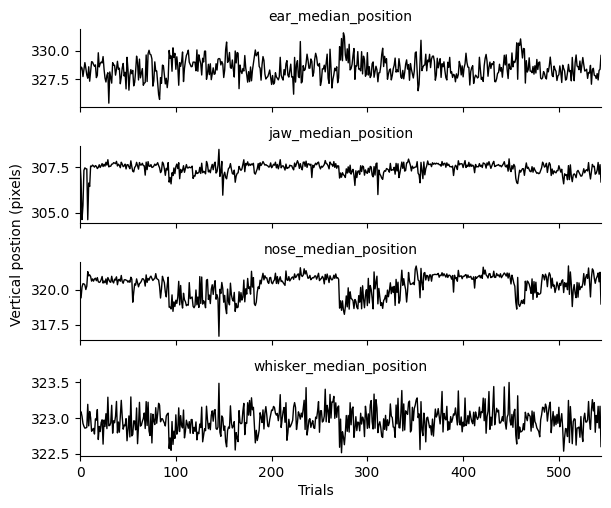

In [13]:
fig, ax = plt.subplots(4, 1, figsize = (6, 5), sharex = True)

for i, key in enumerate(facial_data.keys()):
    ax[i].plot(trials.index, facial_data[key], color = 'k', lw = 1)
    ax[i].set_title(key, fontsize = 10)
    
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].set_xlim(trials.index[0], trials.index[-1])

fig.text(0.5, 0.00, 'Trials', ha='center')
fig.text(-0.01, 0.5, 'Vertical postion (pixels)', va='center', rotation='vertical')
plt.tight_layout()

In [9]:
behavior_data = {}
# running
running_data = session.processing['behavior']['running_speed']
running_timestamps = running_data.timestamps[:]
running_speed = running_data.data[:]
running_speed = pd.Series(running_speed).interpolate(limit_direction='both').to_numpy() 
behavior_data['mean_speed'] = get_trialwise_values(running_speed, running_timestamps, trial_start, trial_stop)


# pupil
pupil_data = session.processing['behavior']['eye_tracking']
pupil_timestamps = pupil_data.timestamps[:]
pupil_area = pupil_data.pupil_area[:]
pupil_area = pd.Series(pupil_area).interpolate(limit_direction='both').to_numpy() 
behavior_data['mean_pupil_area'] = get_trialwise_values(pupil_area, pupil_timestamps, trial_start, trial_stop)

behavior_data = pd.DataFrame(behavior_data)

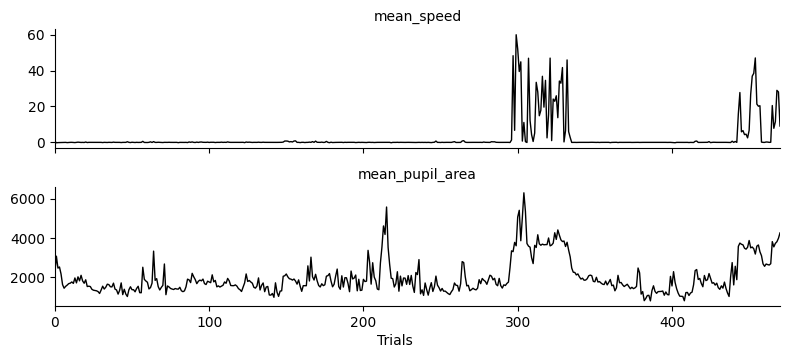

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (8, 3.5), sharex = True)

for i, key in enumerate(behavior_data.keys()):
    ax[i].plot(trials.index, behavior_data[key], color = 'k', lw = 1)
    ax[i].set_title(key, fontsize = 10)
    
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].set_xlim(trials.index[0], trials.index[-1])

fig.text(0.5, 0.00, 'Trials', ha='center')

plt.tight_layout()

In [11]:
# response rates
vis1_response_rate = trials[(trials["stim_name"] == 'vis1')].is_hit.rolling(5).mean()
vis2_response_rate = trials[(trials["stim_name"] == 'vis2')].is_hit.rolling(5).mean()
sound1_response_rate = trials[(trials["stim_name"] == 'sound1')].is_hit.rolling(5).mean()
sound2_response_rate = trials[(trials["stim_name"] == 'sound2')].is_hit.rolling(5).mean()
false_alarm_rate =  trials.is_false_alarm.rolling(5).mean()


# lick counts - exclude when analyzing quiescent interval.
lick_data = session.processing['behavior']['licks']
lick_times = lick_data.timestamps[:]
lick_duration = lick_data.data[:]
lick_duration_threshold = 0.5
lick_times = lick_times[lick_duration < lick_duration_threshold]
in_bin = (lick_times[:, None] >= trial_start) & (lick_times[:, None] < trial_stop)
lick_counts = np.sum(in_bin, axis=0).astype(int)

task_data = pd.DataFrame({
    'vis1_response_rate': vis1_response_rate, 
    'vis2_response_rate': vis2_response_rate,
    'sound1_response_rate': sound1_response_rate,
    'sound2_response_rate': sound2_response_rate,
    'false_alarm_rate': false_alarm_rate,
    'lick_counts': lick_counts
})

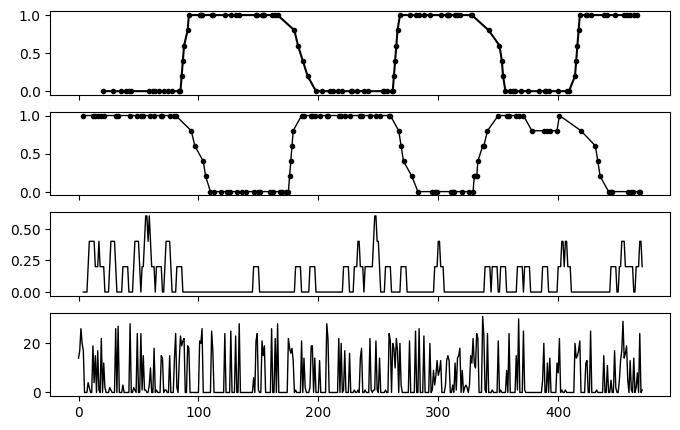

In [12]:
fig, ax = plt.subplots(4, 1, figsize = (8,5), sharex = True)
ax[0].plot(vis1_response_rate, color = 'k', marker = '.')
ax[1].plot(sound1_response_rate, color = 'k', marker = '.', lw = 1)
ax[2].plot(false_alarm_rate, color = 'k',  lw = 1)
ax[3].plot(lick_counts, color = 'k', lw = 1)


In [13]:
# For this model, it's important that the data is converted into a *JAX* array
observations = jnp.array( facial_data.values)
num_trials, num_dimensions = observations.shape

# First scale the dimensions of the data to be normalized
scaler = StandardScaler()    
observations = scaler.fit_transform(observations)

# Split the data into equal length batches for cross-validation
n_batches = 6
n_steps = num_trials - (num_trials % n_batches)
batched_observations = observations[:n_steps, :].reshape(n_batches, -1, observations.shape[1])
batch_size = batched_observations.shape[1]

In [14]:

# Define empty lists that we'll populate below
avg_test_log_probs = []
all_test_log_probs = []
std_test_log_probs = []
similarity_of_states_across_batches = []

key = jr.PRNGKey(0)
num_states_range = np.arange(1, 6)
# Run a loop to fit the data to a range of states
for num_states in num_states_range:
    print(f"\n{'='*40}\nTraining model with {num_states} state(s)\n{'='*40}")

    test_log_probs = []
    
    predicted_states = np.zeros([num_trials, n_batches], dtype = int)
    
    for batch in range(n_batches):
        # Extract all but this batch for training
        train_observations = np.concatenate([batched_observations[:batch], batched_observations[batch+1:]])#.reshape((n_batches - 1)*batch_size, -1)
        flat_train_observations = train_observations.reshape((n_batches - 1) * batch_size, -1)
        if num_states == 1:
            train_mean = jnp.mean(flat_train_observations, axis=0).reshape([1,num_dimensions])
            train_cov = jnp.cov(flat_train_observations.T)
            test_data = jnp.array(batched_observations[batch])    #scaler.transform(jnp.array(batched_observations[batch]))
            test_lp = tfd.MultivariateNormalFullCovariance(train_mean, train_cov).log_prob(batched_observations[batch]).sum()
        else:
            # Make an HMM
            hmm = GaussianHMM(num_states, num_dimensions, transition_matrix_stickiness=10.)
            params, param_props = hmm.initialize(key=key, method="kmeans", emissions=jnp.array(train_observations))

            # Fit the model
            params, lps = hmm.fit_em(params, param_props, jnp.array(train_observations), num_iters=500)
            
            #extract predicted states
            predicted_states[:,batch] = hmm.most_likely_states(params, observations)

            # Evaluate the log probability on held out data
            test_lp = hmm.marginal_log_prob(params, jnp.array(batched_observations[batch]))
        test_log_probs.append(test_lp)

    # Calculate the similarity of each set of predicted states
    if batch != 1:
        distance_between_batches = []
        for i in range(n_batches):
            for j in range(i-1):
                bestpermutation = find_permutation(predicted_states[:,i], predicted_states[:,j])
                distance_between_batches.append(np.sum(jnp.take(bestpermutation, predicted_states[:,i]) == predicted_states[:,j])/observations.shape[0])
        similarity_of_states_across_batches.append(np.mean(distance_between_batches))
    else:
        similarity_of_states_across_batches.append(1)
        
    # Store the average test log prob
    all_test_log_probs.append(test_log_probs)
    avg_test_log_probs.append(np.nanmean(test_log_probs))
    std_test_log_probs.append(np.nanstd(test_log_probs))    


Training model with 1 state(s)

Training model with 2 state(s)



Training model with 3 state(s)



Training model with 4 state(s)



Training model with 5 state(s)


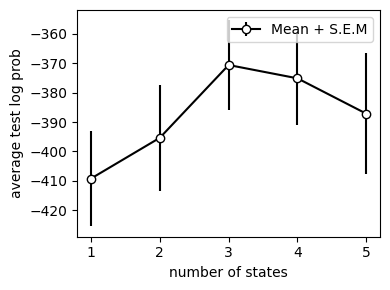

In [15]:
plt.figure(figsize = (4, 3))
plt.errorbar(num_states_range, avg_test_log_probs, yerr = np.array(std_test_log_probs)/np.sqrt(n_batches), mfc = 'w', color = 'k', marker = 'o')

# If you like, you can plot up each of the log_probs from the session.
#for k, test_log_probs in zip(num_states_range, all_test_log_probs):
#    plt.plot(k * np.ones(n_batches), test_log_probs, 'r.')

plt.legend(['Mean + S.E.M'])
plt.xlabel("number of states")
plt.ylabel("average test log prob")
plt.tight_layout()

In [16]:
key = jr.PRNGKey(0)
best_num_states = 3
number_of_states = best_num_states 
final_hmm = GaussianHMM(number_of_states, num_dimensions, transition_matrix_stickiness=10.)
params, param_props = final_hmm.initialize(key=key, method="kmeans", emissions=jnp.array(observations))
params, lps = final_hmm.fit_em(params, param_props, jnp.array(observations), num_iters=500)


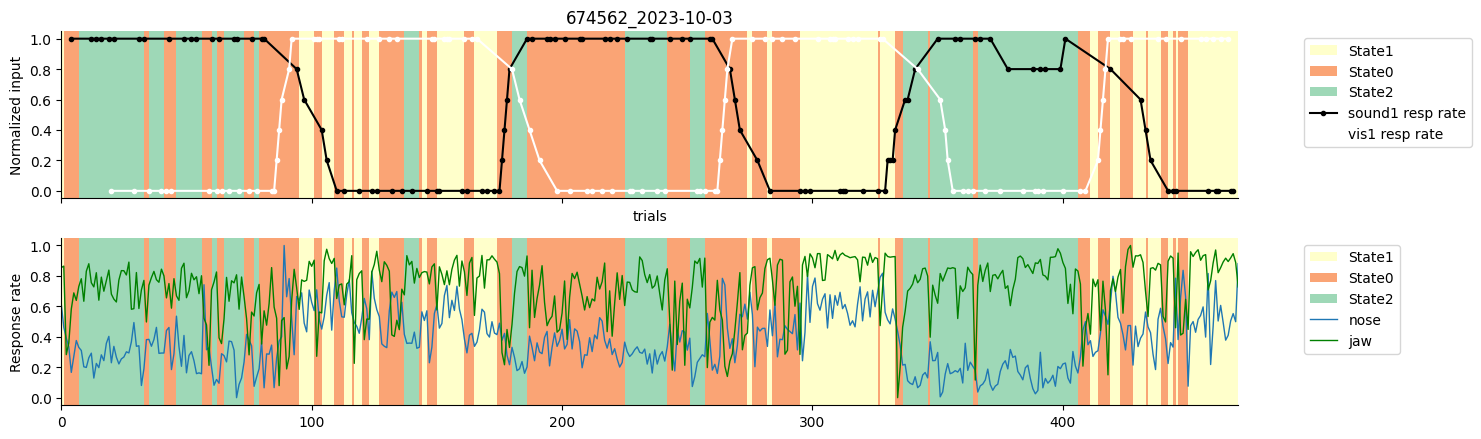

In [17]:
go_trials = np.arange(len(trials))

def minmax(x):
    # Function to normalize the data for easy visualization
    return (x - np.min(x))/(np.max(x) - np.min(x)) 


# Find the most likely discrete states given the learned model parameters
most_likely_states = final_hmm.most_likely_states(params, observations)

# Overlay the precision and recall curves on top of the inferred states
fig, ax = plt.subplots(2, 1, figsize=(15, 4.5), sharex=True)
cmap =sns.color_palette("Spectral", best_num_states)
bounds=np.arange(-0.5, best_num_states, 0.5)

# Define state boundaries 
states = most_likely_states
switch_trials = np.where(np.diff(states))[0]
switch_trials = np.concatenate(([0], switch_trials, [len(go_trials)-1]))

# Plot the states 
for j in range(2):
    for i, trial in enumerate(switch_trials[:-1]):
        for state_no in range(best_num_states):
            if states[trial+1] == state_no: 
                ax[j].axvspan(go_trials[trial], go_trials[switch_trials[i+1]], 
                        facecolor= cmap[state_no], alpha=0.8, label = 'State' + str(state_no))


ax[0].plot(sound1_response_rate, color = 'k', label = 'sound1 resp rate', marker='.')
ax[0].plot(vis1_response_rate, color = 'w', label = 'vis1 resp rate', marker = '.')



# Overlay behavioral variables 
ax[1].plot(go_trials, minmax(facial_data['nose_median_position']), color = 'tab:blue', label="nose", lw = 1)
ax[1].plot(go_trials, minmax(facial_data['jaw_median_position']), color = 'green', label="jaw", lw = 1)



# Formatting 
ax[0].set_xlim(go_trials[0], go_trials[-1])
ax[0].set_title(f'{session_id}')
ax[0].set_ylabel("Normalized input")
ax[0].set_xlabel("trials")
handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys(), bbox_to_anchor = (1.05, 1), fontsize = 10)

ax[1].set_ylabel('Response rate')

handles, labels = ax[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[1].legend(by_label.values(), by_label.keys(), bbox_to_anchor = (1.05, 1), fontsize = 10)


for j in range(2): 
    ax[j].spines["top"].set_visible(False)
    ax[j].spines["right"].set_visible(False)


plt.tight_layout()

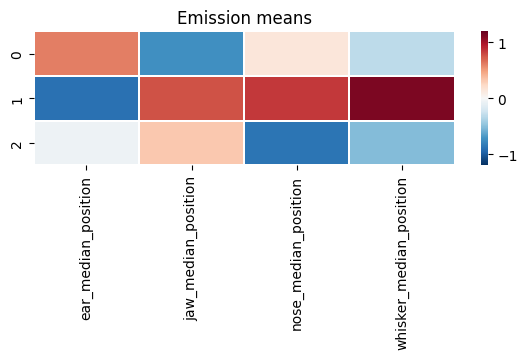

In [18]:
plt.figure(figsize = (5.8, 3.7))
sns.heatmap(params.emissions.means, xticklabels = facial_data.keys(), yticklabels= np.arange(number_of_states), cmap = 'RdBu_r', linewidths=0.2, vmax = 1.2, vmin = -1.2)
plt.title('Emission means')
plt.tight_layout()

In [ ]:
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px;">
  <p> There are several ways to assess behavioral states:</p>

  <ul style="margin-top: 0;">
    <li>Arousal variables such as locomotion and pupil dilation.</li>
    <li>Facial expressions.</li>
    <li>Task performance.</li>
    <li>And many more...</li>
  </ul>

  <p>
    Let’s first look at each of these categories and how mice vary their behaviors.
  </p>
</div>